In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 9].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [3]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,9,2012-01-01,34.0,19.0,26.5,NaN,17.0,23.0,38.0,0.0,NaN,NaN,UP,0.0,0.005,29.34,30.09,22.8,30.0,22.5,2012,1,1,66.939952,12.019835,NaN,6,1,1,1,0,0
1,9,2012-01-02,21.0,11.0,16.0,NaN,8.0,15.0,49.0,0.0,NaN,NaN,SN UP,0.0,0.005,29.67,30.44,14.4,32.0,14.7,2012,1,2,70.190284,1.239414,NaN,0,0,1,1,0,0
2,9,2012-01-03,28.0,10.0,19.0,NaN,11.0,18.0,46.0,0.0,NaN,NaN,MD,0.0,0.000,29.26,30.12,8.9,16.0,9.2,2012,1,3,70.544466,8.143835,NaN,1,0,0,0,0,1
3,9,2012-01-04,39.0,20.0,29.5,NaN,22.0,26.0,35.0,0.0,NaN,NaN,BR,0.0,0.000,29.26,30.06,2.8,28.0,5.2,2012,1,4,73.270795,23.951097,NaN,2,0,1,1,0,0
4,9,2012-01-05,46.0,21.0,33.5,NaN,28.0,32.0,31.0,0.0,NaN,NaN,BR,0.0,0.000,28.95,29.73,0.9,17.0,2.1,2012,1,5,80.022191,32.430550,NaN,3,0,1,1,0,0


In [4]:
len(station)

1035

In [5]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 795 ( 76.81 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 3 ( 0.29 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 1035 ( 100.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [6]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [7]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [8]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
213115,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,107,0
213116,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,108,0
213117,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,109,0
213118,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,110,0
213119,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,111,0


In [9]:
station['log1p_units'] = np.log1p(station.units)

In [10]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [11]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
213115,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,107
213116,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,108
213117,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,109
213118,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,110
213119,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,111


In [12]:
len(station)

213120

In [13]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [14]:
df2.to_csv("station9.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [15]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     803.6
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:27:59   Log-Likelihood:            -7.4350e+05
No. Observations:              212454   AIC:                         1.487e+06
Df Residuals:                  212279   BIC:                         1.489e+06
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      4.7971      4

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [16]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     800.2
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:30:36   Log-Likelihood:            -7.4344e+05
No. Observations:              212454   AIC:                         1.487e+06
Df Residuals:                  212278   BIC:                         1.489e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [17]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

4913

In [18]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
208202,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,107,0
208203,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,108,0
208204,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,109,0
208205,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,110,0
208206,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,111,0


In [19]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     3222.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:31:33   Log-Likelihood:            -4.2439e+05
No. Observations:              207558   AIC:                         8.491e+05
Df Residuals:                  207382   BIC:                         8.509e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 약간 상승했으나, conditional number도 상승했다.

### 4. 변수변환 : df2 (log1p_units) 

In [22]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1024.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:35:58   Log-Likelihood:                -93175.
No. Observations:              212454   AIC:                         1.867e+05
Df Residuals:                  212278   BIC:                         1.885e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [23]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

8261

In [24]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
204854,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,107,0.0
204855,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,108,0.0
204856,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,109,0.0
204857,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,110,0.0
204858,9,2014-10-31,39.0,25.0,32.0,NaN,18.0,27.0,33.0,0.0,NaN,NaN,MD,NaN,0.0,29.74,30.52,8.3,36.0,8.7,2014,10,31,55.839809,24.430096,NaN,4,0,0,0,0,1,24,111,0.0


In [25]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2018.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:38:37   Log-Likelihood:             2.3220e+05
No. Observations:              204222   AIC:                        -4.640e+05
Df Residuals:                  204046   BIC:                        -4.622e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [27]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2018.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:40:27   Log-Likelihood:             2.3220e+05
No. Observations:              204222   AIC:                        -4.640e+05
Df Residuals:                  204046   BIC:                        -4.622e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/stnpressure/sealevel제거(VIF에 근거)

In [29]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2077.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:45:27   Log-Likelihood:             2.3219e+05
No. Observations:              204222   AIC:                        -4.640e+05
Df Residuals:                  204051   BIC:                        -4.623e+05
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [42]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2102.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:48:15   Log-Likelihood:             2.3219e+05
No. Observations:              204222   AIC:                        -4.641e+05
Df Residuals:                  204053   BIC:                        -4.623e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/relative_humility제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [47]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2127.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:51:17   Log-Likelihood:             2.3219e+05
No. Observations:              204222   AIC:                        -4.641e+05
Df Residuals:                  204055   BIC:                        -4.623e+05
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

wetbulb, dewpoint추가로 지웠더니 conditional number 232까지 감소

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/relative_humility제거(VIF에 근거)  + 유의하지 않은 변수 제거 후-> 정규화

In [55]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(item_nbr) + C(month)+ 0', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1486.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:01:18   Log-Likelihood:                -93458.
No. Observations:              213120   AIC:                         1.872e+05
Df Residuals:                  212998   BIC:                         1.884e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(item_nbr)[1]       0.0051      0.009  

### F- 검정

In [56]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(item_nbr),111.0,26481.374421,238.570941,1694.134078,0.000000
C(month),11.0,4.329821,0.393620,2.795165,0.001209
Residual,212998.0,29994.753007,0.140822,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

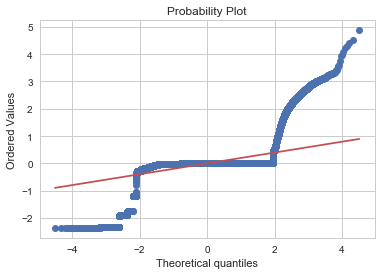

In [57]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',\
          'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

,VIF Factor,features
0,508408.775445,sealevel
1,501283.799718,stnpressure
2,258266.344855,tavg
3,85548.824276,tmax
4,43914.797655,tmin
5,2860.530216,dewpoint
6,2511.741105,windchill
7,1102.831017,relative_humility
8,270.285467,wetbulb
9,100.631162,heat


tmax, tavg, tmin, stnpressure, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [30]:
cols = ['dewpoint', 'wetbulb', 'heat', 'cool',\
          'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,606.182691,dewpoint
1,299.222088,windchill
2,237.352019,wetbulb
3,235.466644,relative_humility
4,72.103790,heat
5,40.832455,avgspeed
6,26.820118,resultspeed
7,4.211243,item_nbr
8,1.837464,cool
9,1.354275,preciptotal


### VIF : dewpoint 버리고 다시 

In [35]:
cols = ['wetbulb', 'heat', 'cool',\
          'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,230.637295,wetbulb
1,161.178551,windchill
2,45.316143,relative_humility
3,39.191985,avgspeed
4,26.604569,resultspeed
5,16.323734,heat
6,4.190647,item_nbr
7,1.489920,cool
8,1.350849,preciptotal


### VIF : wetbulb 버리고 다시 

In [40]:
cols = ['heat', 'cool',\
        'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,39.105191,avgspeed
1,34.748802,relative_humility
2,26.213240,resultspeed
3,20.736006,windchill
4,16.117751,heat
5,4.190256,item_nbr
6,1.475902,cool
7,1.350591,preciptotal


### VIF : avgspeed 버리고 다시 

In [43]:
cols = ['heat', 'cool',\
        'preciptotal', 'resultspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,34.654342,relative_humility
1,19.163989,windchill
2,14.863312,heat
3,4.189564,item_nbr
4,3.731294,resultspeed
5,1.447516,cool
6,1.305028,preciptotal


### VIF :  relative_humility 버리고 다시 

In [45]:
cols =['heat', 'cool',\
        'preciptotal', 'resultspeed', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,4.187293,windchill
1,4.185695,item_nbr
2,3.731284,resultspeed
3,3.167752,heat
4,1.386360,cool
5,1.168260,preciptotal


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [59]:
from patsy import dmatrix

In [60]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [61]:
len(df2_1_X), len(df2_1_target)

(204859, 204859)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [62]:
formula = 'C(month) + C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.63742252, 0.66686516, 0.62747616, 0.5179597 , 0.59471147,
       0.63441421, 0.68903317, 0.68080311, 0.60509699, 0.60080625])

In [64]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.08612955, 0.09302747, 0.1009525 , 0.09686377, 0.09225273,
       0.09295571, 0.08997282, 0.08050208, 0.09537359, 0.09390414])

In [65]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([-0.0056294 , -0.00462829, -0.00521735, -0.0054067 , -0.00521929,
       -0.00518967, -0.00459281, -0.0044568 , -0.00425286, -0.00572162])

In [66]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([-0.0056294 , -0.00462829, -0.00521735, -0.0054067 , -0.00521929,
       -0.00518967, -0.00459281, -0.0044568 , -0.00425286, -0.00572162])

### station 평균성능

In [67]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.625458872538365,
 0.09219343614377365,
 -0.005031479546557227,
 -0.005031479546557227)